# <Center> <HR> <font color="blue"> Rearrange array in alternating positive & negative items</font> <HR> </Center> 
    
    Given an array of positive and negative numbers, arrange them in an alternate fashion such that every positive number is followed by negative and vice-versa maintaining the order of appearance. Number of positive and negative numbers need not be equal. If there are more positive numbers they appear at the end of the array. If there are more negative numbers, they too appear in the end of the array. 
    Note: You have to takecare about the order of the appearance of elements

## Using Extra Space
    Time complexity : O(n) || Auxiliary Space : O(n)

In [1]:
def rearrange_1(arr, n):
    
    posList = list(filter(lambda x: x >= 0, arr))
    negList = list(filter(lambda x: x < 0, arr))
    m1, m2 = len(posList), len(negList)
    
    i, pos_i, neg_i = 0, 0, 0
    while pos_i < m1 or neg_i < m2:
        if pos_i < m1:
            arr[i] = posList[pos_i]
            i += 1
            pos_i += 1
        if neg_i < m2:
            arr[i] = negList[neg_i]
            i+= 1
            neg_i += 1

## Using Extra Space - Deque
    Time complexity : O(n) || Auxiliary Space : O(n)

In [2]:
from collections import deque

def rearrange_2(arr, n):
    
    posQ = deque(filter(lambda x: x >= 0, arr))
    negQ = deque(filter(lambda x: x < 0, arr))
    
    i = 0
    while posQ or negQ:
        if posQ:
            arr[i] = posQ.popleft()
            i += 1
        if negQ:
            arr[i] = negQ.popleft()
            i+= 1

## 3. Using SubArray Rotation
    Time complexity : O(n^2) || Auxiliary Space : O(n)

In [3]:
def rightRotation(arr, left, right):
    temp = arr[right]
    for i in range(right,left,-1):
        arr[i] = arr[i-1]
    arr[left] = temp

def rearrange_3(arr, n):
    
    wrongPosition = -1
    for i in range(n):
        if wrongPosition >= 0:
            if (arr[wrongPosition] < 0 and arr[i] >=0 ) or (arr[wrongPosition] >= 0 and arr[i] < 0):
                rightRotation(arr, wrongPosition, i)
                if i - wrongPosition > 2:
                    wrongPosition += 2
                else:
                    wrongPosition = -1
        if wrongPosition == -1:   #
            if (arr[i] < 0 and (i+1)%2!=0) or (arr[i] >= 0 and (i+1)%2==0):
                wrongPosition = i

# Testing

In [4]:
n = int(input())
arr = list(map(int, input().strip().split()))

rearrange_1(arr, n)

print(*arr)

9
-1 2 -3 4 5 6 -7 8 9
2 -1 4 -3 5 -7 6 8 9


## Comparison of Different Approaches

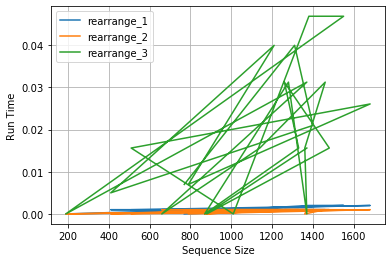

In [13]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt 
%matplotlib inline


n_execution = 25
random_Size = lambda : np.random.randint(5,100)*10
arr_list = [np.concatenate([np.random.randint(200,500,random_Size()),np.random.randint(-500,-200,random_Size())]) for _ in range(n_execution)]

for fun in ["rearrange_1", "rearrange_2", "rearrange_3"]:
    
    times, arr_size = [], []
    for arr in arr_list:
        random.shuffle(arr)
        n = len(arr)
        
        s = time.time()
        eval(fun)(arr, n)
        e = time.time()
        
        times.append(e-s)
        arr_size.append(n)
        
    plt.plot(arr_size, times, label = fun) 
    
plt.xlabel('Sequence Size') 
plt.ylabel('Run Time') 
plt.grid() 
plt.legend()
plt.show() 